## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

In [10]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Task 2 : Loading VGG Pretrained Model

In [11]:
import torch 
from torchvision import models
vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [12]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [13]:
for parameters in vgg.parameters():

  parameters.requires_grad_(False)

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [15]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [16]:
from PIL import Image 
from torchvision import transforms as T

def preprocess(img_path, max_size = 500):
  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size: 
    size = max_size

  else:
    size = max(image.size) 
  
  img_transforms = T.Compose([
      T.Resize(size), 
      T.ToTensor(), 
      T.Normalize(mean = [0.485, 0.456, 0.406],
                  std = [0.229, 0.224, 0.225]) 
  ])

  image = img_transforms(image)
  image = image.unsqueeze(0) 
  return image

In [18]:
content_p = preprocess('/content/content1.jpg')
style_p = preprocess('/content/style1.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content Shape",content_p.shape)
print("Style Shape",style_p.shape)

Content Shape torch.Size([1, 3, 756, 500])
Style Shape torch.Size([1, 3, 500, 712])


## Task 4 : Deprocess image

In [19]:
import numpy as np
import matplotlib.pyplot as plt
 
def deprocess(tensor):
  image = tensor.to('cpu').clone() 
  image = image.numpy() 
  image = image.squeeze(0) 
  image = image.transpose(1,2,0) 
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]) 
  image = image.clip(0,1) 

  return image

In [20]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print('Deprocess content : ',content_d.shape)
print('Deprocess style : ',style_d.shape)


Deprocess content :  (756, 500, 3)
Deprocess style :  (500, 712, 3)


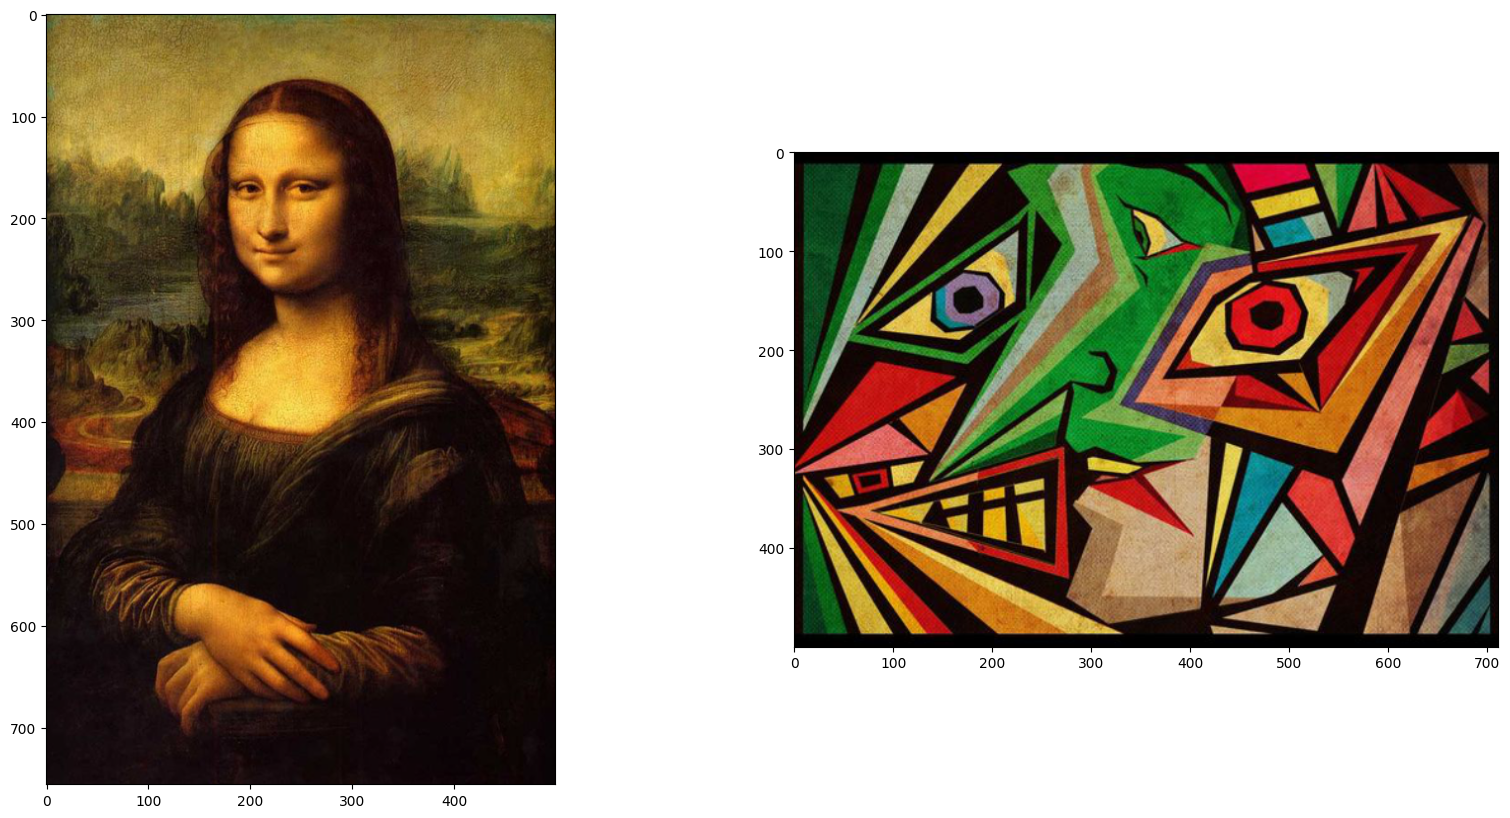

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20, 10))
ax1.imshow(content_d)
ax2.imshow(style_d)


## Task 5 : Get content,style features and create gram matrix

In [22]:
def get_features(image, model, layers):
    layers = {'conv1_1': 0, 'conv2_1': 5, 'conv3_1': 10, 'conv4_1': 19, 'conv4_2': 21, 'conv5_1': 28}
    x = image
    activations = {}

    def forward_hook(name):
        def hook(module, x, y):
            activations[name] = y
        return hook

    for name, module in model.named_modules():
        if name in layers:
            module.register_forward_hook(forward_hook(name))

    model(x)
    return activations



In [23]:
def get_features(image, model):
   
    layers = {
        '0':'conv1_1',
        '5':'conv2_1',
        '10':'conv3_1',
        '19':'conv4_1',
        '21':'conv4_2',
        '28':'conv5_1'
              }
    features = {}
    x = image
    
    for name, layer in model._modules.items():
        x = layer(x)
        
        if name in layers:
            features[layers[name]] = x
    return features


content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

content_f,style_f


({'conv1_1': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[0.9856, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [2.3011, 0.3592, 0.1477,  ..., 0.5935, 0.3466, 0.0000],
            [1.8615, 0.5717, 0.2217,  ..., 0.6001, 0.9081, 0.0000],
            ...,
            [5.0094, 0.4114, 0.3187,  ..., 0.2959, 0.2959, 0.0000],
            [4.9884, 0.4446, 0.3525,  ..., 0.2959, 0.2959, 0.0000],
            [6.2895, 3.8743, 3.8512,  ..., 4.1273, 4.1273, 0.0758]],
  
           [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.00

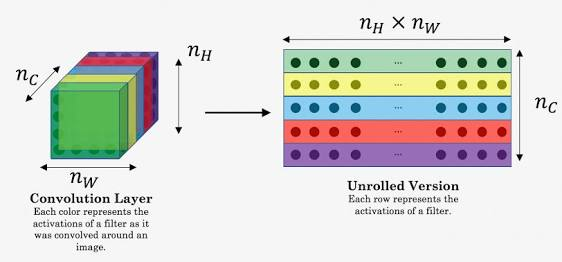

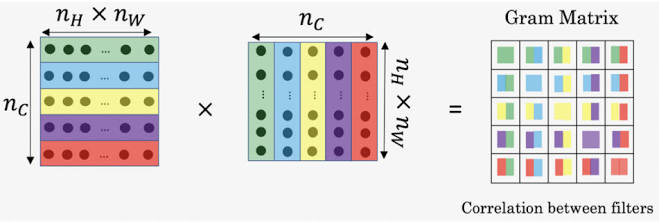

In [24]:
def gram_matrix(tensor):
  b,c,h,w = tensor.size()
  tensor = tensor.view(c, h*w)
  gram = torch.mm(tensor,tensor.t())
  return gram

In [25]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [35]:
def content_loss(content_features, target_features):
    a=torch.mean((content_features - target_features) ** 2)
    return a

def style_loss(style_features, target_features,ch):
    style_loss = 0
    for i in style_features:
       target=target_features[i]
       target_g=gram_matrix(target)
       style_g=ch[i]
       _,c,h,w=target.shape
       layer_l=style_weights[i]*torch.mean((target_g - style_g)**2)
       style_loss+=layer_l/(c*h*w)
    return style_loss



In [27]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [28]:
torch.mean(torch.randn(1, 3))

tensor(0.1668)

In [29]:
layers = {'conv1_1': 0, 'conv2_1': 5, 'conv3_1': 10, 'conv4_1': 19, 'conv4_2': 21, 'conv5_1': 28}

content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)


In [30]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)

In [31]:
content_loss = torch.mean((target_f['conv4_2']- content_f['conv4_2'])**2)
style_loss = style_loss(style_weights,target_f, style_grams)

In [32]:
print('Content Loss:', content_loss)
print('Style Loss:', style_loss)

Content Loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss: tensor(671.6951, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [33]:
from torch import optim

optimizer = optim.Adam([target],lr = 0.003)

alpha = 1
beta = 1e5
epochs = 3000
show_every = 500

In [36]:
style_loss(style_weights,target_f,style_grams)

tensor(671.6951, device='cuda:0', grad_fn=<AddBackward0>)

In [37]:
def total_loss(c_loss,s_loss,alpha,beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [38]:
results = []
for i in range(epochs):
  target_f = get_features(target,vgg)
  c_loss = torch.mean((target_f['conv4_2']- content_f['conv4_2'])**2)
  s_loss = style_loss(style_weights,target_f,style_grams)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print('Total loss at Epoch  {} : {}'.format(i,t_loss))
    results.append(deprocess(target.detach()))

Total loss at Epoch  0 : 67169504.0
Total loss at Epoch  500 : 4168713.25
Total loss at Epoch  1000 : 1181545.5
Total loss at Epoch  1500 : 627877.4375
Total loss at Epoch  2000 : 407339.5
Total loss at Epoch  2500 : 285337.96875


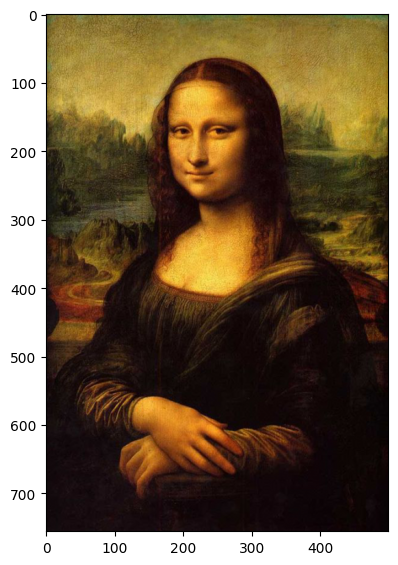

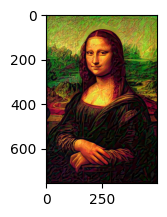

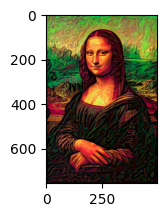

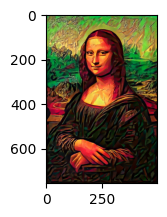

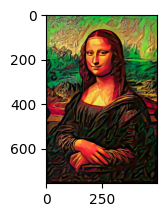

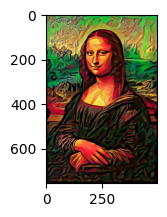

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))

for i in range(len(results)):
  plt.subplot(2,3,i+1)
  plt.imshow(results[i])
  plt.show()